# Aprendizaje Automático

# CentroGeo

## Jorge David Martínez Cervantes

## 3 de junio del 2021

# Instrucciones:

Ejercicio de regresión lineal cuadrática con Fish

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [97]:
datos = pd.read_csv("../data/Fish.csv")
datos = datos.loc[datos["Species"] == "Perch"] # Obtener un subconjunto de la tabla con la especie Perch
datos.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [98]:
datos_normalizados = pd.DataFrame.copy(datos)
datos_normalizados.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


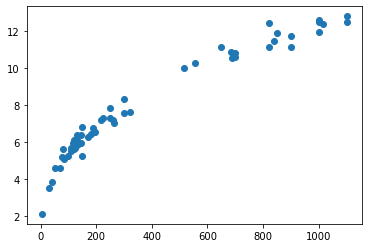

In [99]:
plt.scatter(datos["Weight"], datos["Height"])
# Graficar todas las demás variables en subplots

Normalizar los datos de 0 a 1 (solo las variables de los ejemplos, no el peso).

In [100]:
n_datos = len(datos_normalizados)
min_max_scaler = preprocessing.MinMaxScaler()

y = datos_normalizados["Weight"].to_numpy()
y = y.reshape((n_datos,1))

# Length 1
xl1 = datos_normalizados['Length1'].to_numpy()
xl1_scaled = min_max_scaler.fit_transform(xl1.reshape((n_datos,1)))

# Lenght 2
xl2 = datos_normalizados['Length2'].to_numpy()
xl2_scaled = min_max_scaler.fit_transform(xl2.reshape((n_datos,1)))

# Lenght 3
xl3 = datos_normalizados['Length2'].to_numpy()
xl3_scaled = min_max_scaler.fit_transform(xl3.reshape((n_datos,1)))

# Height
xh = datos_normalizados['Height'].to_numpy()
xh_scaled = min_max_scaler.fit_transform(xh.reshape((n_datos,1)))

# Width
xw = datos_normalizados['Width'].to_numpy()
xw_scaled = min_max_scaler.fit_transform(xw.reshape((n_datos,1)))


Extender los vectores con términos cuadráticos.

In [101]:
grado = 2
trans = PolynomialFeatures(grado)

# Length 1
xl1_ext = trans.fit_transform(xl1_scaled)

# Lenght 2
xl2_ext = trans.fit_transform(xl2_scaled)

# Lenght 3
xl3_ext = trans.fit_transform(xl3_scaled)

# Height
xh_ext = trans.fit_transform(xh_scaled)

# Width
xw_ext = trans.fit_transform(xw_scaled)

Usar descenso de gradiente para aproximar la solución.

In [102]:
epochs = 10000
lr = .0001
W = np.zeros((grado + 1, 1))

n_test = 100
x_test = np.linspace(0, 1, n_test).reshape((n_test, 1))
x_test = trans.fit_transform(x_test)

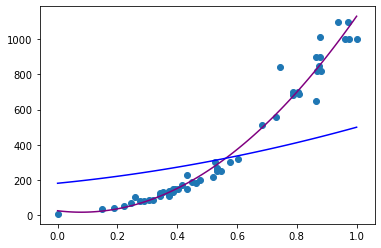

El error cuadrático medio es: 3342.1144232603065


In [103]:
# Length 1
wl1 = np.linalg.pinv(xl1_ext.T.dot(xl1_ext)).dot((xl1_ext.T.dot(y)))
for i in range(epochs):
    prev = W
    Y = np.matmul(xl1_ext, W)
    D_j = sum((Y - y) * xl1_ext).reshape(grado + 1, 1) / n_datos
    W = W - (lr * D_j)
    diff = np.linalg.norm(prev - W)
    if (diff > 100):
        print("Muy grande", i)
        break
    if (diff < .01):
        print("Convergió.", i)
        break

plt.scatter(xl1_ext[:, 1], y)
plt.plot(x_test[:, 1], np.matmul(x_test, wl1), c="purple")
plt.plot(x_test[:, 1], np.matmul(x_test, W), c="blue")
plt.show()

pred_afin_xl1 = [wl1.T.dot(x) for x in xl1_ext]
mse = mean_squared_error(y, pred_afin_xl1)
print("El error cuadrático medio es: " + str(mse))

Convergió. 3945


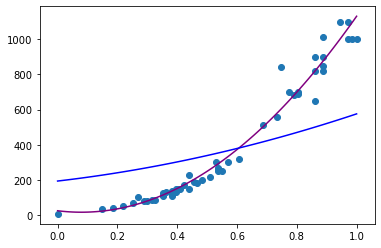

El error cuadrático medio es: 3278.5772668070676


In [104]:
# Length 2
wl2 = np.linalg.pinv(xl2_ext.T.dot(xl1_ext)).dot((xl2_ext.T.dot(y)))
for i in range(epochs):
    prev = W
    Y = np.matmul(xl2_ext, W)
    D_j = sum((Y - y) * xl2_ext).reshape(grado + 1, 1) / n_datos
    W = W - (lr * D_j)
    
    diff = np.linalg.norm(prev - W)
    if (diff > 100):
        print("Muy grande", i)
        break
    if (diff < .01):
        print("Convergió.", i)
        break

plt.scatter(xl2_ext[:, 1], y)
plt.plot(x_test[:, 1], np.matmul(x_test, wl2), c="purple")
plt.plot(x_test[:, 1], np.matmul(x_test, W), c="blue")
plt.show()

pred_afin_xl2 = [wl2.T.dot(x) for x in xl2_ext]
mse = mean_squared_error(y, pred_afin_xl2)
print("El error cuadrático medio es: " + str(mse))

Convergió. 0


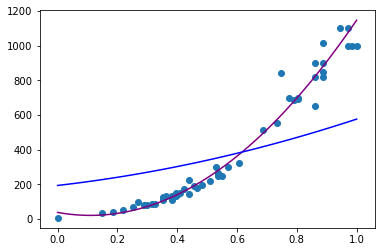

El error cuadrático medio es: 3340.871577714793


In [105]:
# Length 3
wl3 = np.linalg.pinv(xl1_ext.T.dot(xl3_ext)).dot((xl3_ext.T.dot(y)))
for i in range(epochs):
    prev = W
    Y = np.matmul(xl3_ext, W)
    D_j = sum((Y - y) * xl3_ext).reshape(grado + 1, 1) / n_datos
    W = W - (lr * D_j)
    
    diff = np.linalg.norm(prev - W)
    if (diff > 100):
        print("Muy grande", i)
        break
    if (diff < .01):
        print("Convergió.", i)
        break

plt.scatter(xl3_ext[:, 1], y)
plt.plot(x_test[:, 1], np.matmul(x_test, wl3), c="purple")
plt.plot(x_test[:, 1], np.matmul(x_test, W), c="blue")
plt.show()

pred_afin_xl3 = [wl3.T.dot(x) for x in xl3_ext]
mse = mean_squared_error(y, pred_afin_xl3)
print("El error cuadrático medio es: " + str(mse))

Convergió. 759


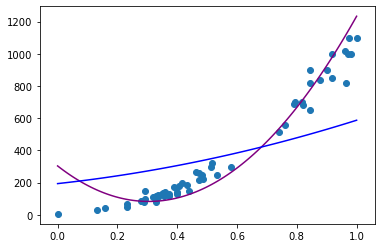

El error cuadrático medio es: 8229.471119621629


In [106]:

# Height
wh = np.linalg.pinv(xl1_ext.T.dot(xh_ext)).dot((xh_ext.T.dot(y)))
for i in range(epochs):
    prev = W
    Y = np.matmul(xh_ext, W)
    D_j = sum((Y - y) * xh_ext).reshape(grado + 1, 1) / n_datos
    W = W - (lr * D_j)
    
    diff = np.linalg.norm(prev - W)
    if (diff > 100):
        print("Muy grande", i)
        break
    if (diff < .01):
        print("Convergió.", i)
        break

plt.scatter(xh_ext[:, 1], y)
plt.plot(x_test[:, 1], np.matmul(x_test, wh), c="purple")
plt.plot(x_test[:, 1], np.matmul(x_test, W), c="blue")
plt.show()

pred_afin_xh = [wh.T.dot(x) for x in xh_ext]
mse = mean_squared_error(y, pred_afin_xh)
print("El error cuadrático medio es: " + str(mse))

Convergió. 1050


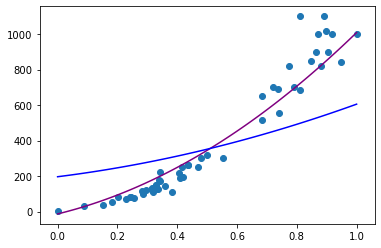

El error cuadrático medio es: 8248.986013607335


In [107]:

# Width
ww = np.linalg.pinv(xl1_ext.T.dot(xw_ext)).dot((xw_ext.T.dot(y)))
for i in range(epochs):
    prev = W
    Y = np.matmul(xw_ext, W)
    D_j = sum((Y - y) * xw_ext).reshape(grado + 1, 1) / n_datos
    W = W - (lr * D_j)
    
    diff = np.linalg.norm(prev - W)
    if (diff > 100):
        print("Muy grande", i)
        break
    if (diff < .01):
        print("Convergió.", i)
        break

plt.scatter(xw_ext[:, 1], y)
plt.plot(x_test[:, 1], np.matmul(x_test, ww), c="purple")
plt.plot(x_test[:, 1], np.matmul(x_test, W), c="blue")
plt.show()

pred_afin_xw = [ww.T.dot(x) for x in xw_ext]
mse = mean_squared_error(y, pred_afin_xw)
print("El error cuadrático medio es: " + str(mse))